<h1>Analisis de datos</h1>

En el siguiente notebook se van a analizar los datos del dataset <b>Melbourne Housing Snapshot</b>, el cual contiene información sobre las viviendas en Melbourne, Australia. Las variables que componen el dataset son:

<table>
    <tr>
        <th> Nombre variable </th>
        <th> Descripción </th>
    </tr>
    <tr>
        <td> Suburb </td>
        <td> Suburbio </td>
    </tr>
    <tr>
        <td> Address </td>
        <td> Dirección </td>
    </tr>
    <tr>
        <td> Rooms </td>
        <td> Número de recamaras </td>
    </tr>
    <tr>
        <td> Type </td>
        <td> Variable categórica que representa el tipo de vivienda, los valores que puede tomar son: br - habitación(es); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; sitio de desarrollo; o res - otro tipo residencial. </td>
    </tr>
    <tr>
        <td> Method </td>
        <td> Variable categórica que representa la situación de una casa, los valores que puede tomar son: S - propiedad vendida; SP - propiedad vendida con anterioridad; PI - propiedad traspasada; PN - vendida con anterioridad no divulgada; SN - vendida no revelada; NB - sin oferta; VB - oferta del vendedor; W - retirada antes de la subasta; SA - vendida después de la subasta; SS - vendida después de la subasta precio no divulgado. N/A - precio u oferta más alta no disponible. </td>
    </tr>
    <tr>
        <td> SellerG </td>
        <td> Agencia de Bienes Raíces </td>
    </tr>
    <tr>
        <td> Date </td>
        <td> Fecha de venta</td>
    </tr>
    <tr>
        <td> Distance </td>
        <td> Distancia (en km) al distrito central de negocios (CBD), es decir, calles comerciales principales y edificios públicos</td>
    </tr>
    <tr>
        <td> Postcode </td>
        <td> Código postal </td>
    </tr>
    <tr>
        <td> Bedroom2 </td>
        <td> Número de recamaras <i>scraped</i> (de diferente fuente) </td>
    </tr>
    <tr>
        <td> Bathroom </td>
        <td> Número de baños</td>
    </tr>
    <tr>
        <td> Car </td>
        <td> Número de espacios para vehículos  </td>
    </tr>
    <tr>
        <td> Landsize </td>
        <td> Área en metros cuadrados del terreno </td>
    </tr>
    <tr>
        <td> BuildingArea </td>
        <td> Área en metros cuadrados de la construcción </td>
    </tr>
    <tr>
        <td> YearBuilt </td>
        <td> Antigüedad de la casa </td>
    </tr>
    <tr>
        <td> CouncilArea </td>
        <td> Ciudad </td>
    </tr>
    <tr>
        <td> Lattitude </td>
        <td> Latitud </td>
    </tr>
    <tr>
        <td> Longtitude </td>
        <td> Longitud  </td>
    </tr>
    <tr>
        <td> Regionname </td>
        <td> Nombre de la región (norte, sur, este, oeste, ...) </td>
    </tr>
    <tr>
        <td> Propertycount </td>
        <td> Número de propiedades que existen en el suburbio </td>
    </tr>
    <tr>
        <td> <b> Price </b> </td>
        <td> <b> Precio de la construcción en dolares </b> </td>
    </tr>
<table>

Fuente: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?resource=download

<h2> Cargando el dataset </h2>

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('./drive/MyDrive/ML/melb_data.csv')

In [ ]:
print(f'El dataset tiene número de registros del dataset es {df.shape[0]}')

El dataset tiene número de registros del dataset es 13580


<h3> Datos nulos </h3>

Dentro del análisis de los datos, lo primero que se tiene que revisar es si el dataset tiene <b>datos nulos</b>.

1. Método <b>info</b>
</br>
2. Método <b>isnull</b>
</br>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
count_null = df.isnull().sum()
cols_null = count_null[count_null > 0]
cols_null = (cols_null / df.shape[0]) * 100
display(cols_null)

Car              0.456554
BuildingArea    47.496318
YearBuilt       39.580265
CouncilArea     10.081001
dtype: float64

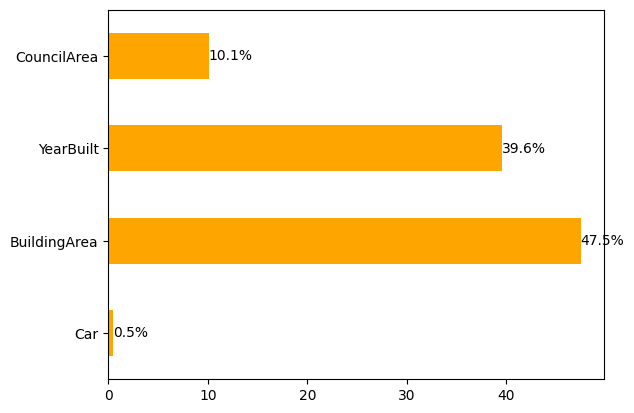

In [ ]:
ax = cols_null.plot.barh(color='orange', rot=0)
ax = ax.bar_label(ax.containers[0], fmt='%.1f%%')

En el gráfico anterior se puede observar que cerca del 50% de los registros no cuentan con la infomación de <i>BuildingArea</i>, por lo tanto para el resto del análisis se va a omitir esa variable.

In [ ]:
lst_var = ['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']

<h3> Variable y (Price) </h3>

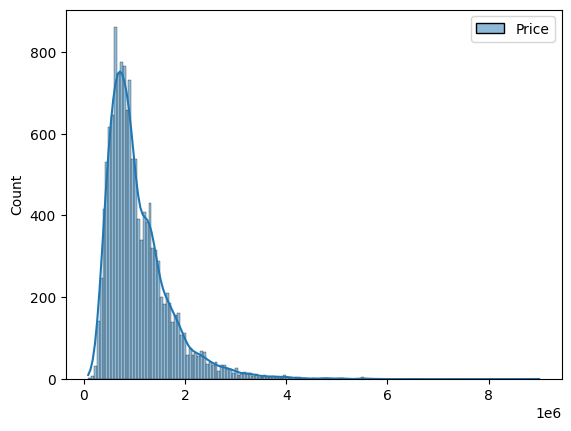

In [ ]:
lst_y = ['Price']

# Se grafica la variable Price mediante un histograma y un diagrama de caja
sb.histplot(df[lst_y], kde=True)
plt.show()

In [ ]:
sb.boxplot(df[lst_y], orient='h')
plt.show()

NameError: name 'sb' is not defined

<h3> Variables categóricas </h3>

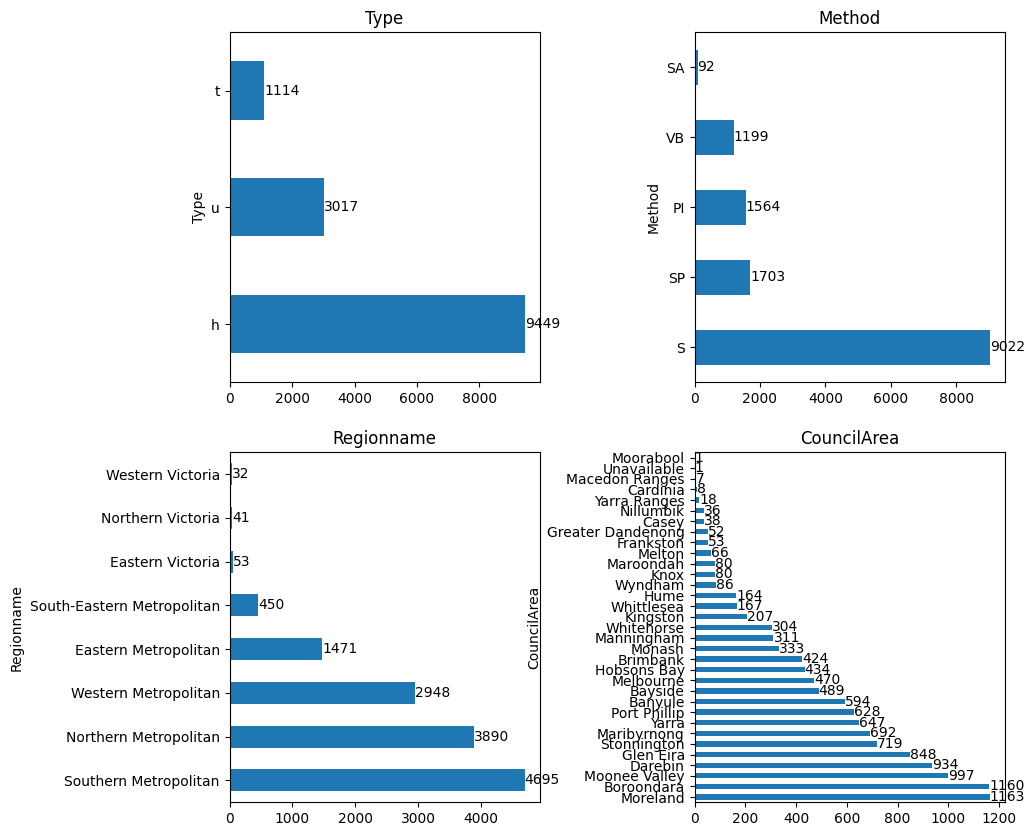

In [ ]:
# Se grafican 4 variables categoricas

lst_cat = ['Type', 'Method', 'Regionname', 'CouncilArea']

fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

plt.subplots_adjust(
    wspace=0.5,
    hspace=0.2
)

for col, ax in zip(df[lst_cat].select_dtypes(include='O'), axes.ravel()):
    df[col].value_counts().plot.barh(ax=ax)
    ax.set_title(col)
    ax.bar_label(ax.containers[0])
plt.show()

<h3> Variables numéricas </h3>

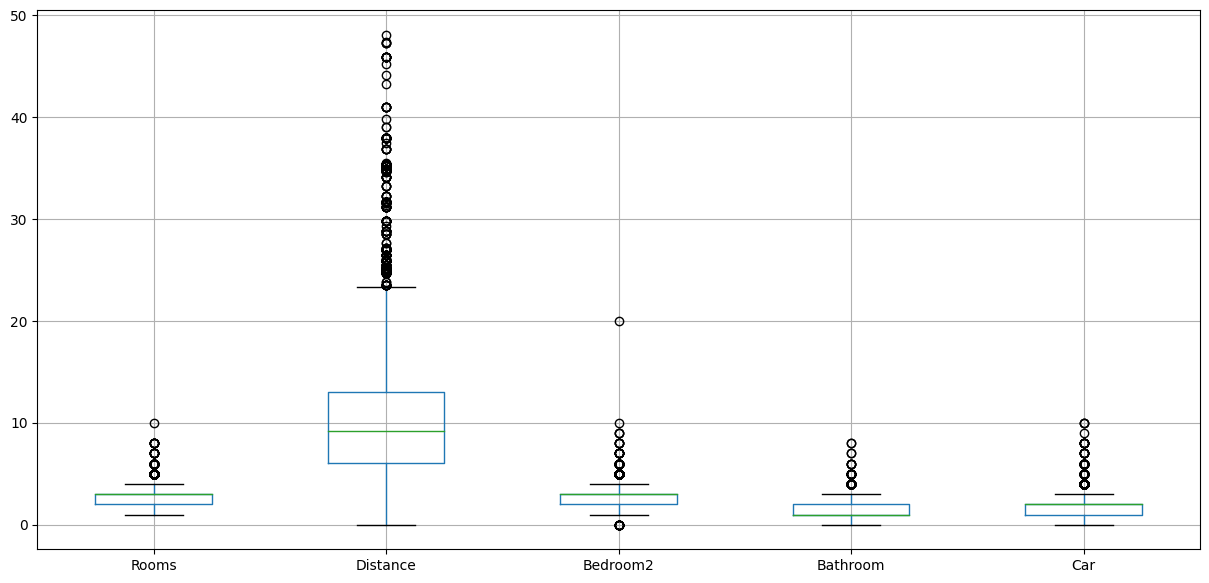

In [ ]:
lst_num = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car'] #, 'Propertycount', 'Landsize']

# Se grafican los diagramas de caja de cada una de las variables numéricas

boxplot = df[lst_num].boxplot(figsize=(15,7))

plt.show()

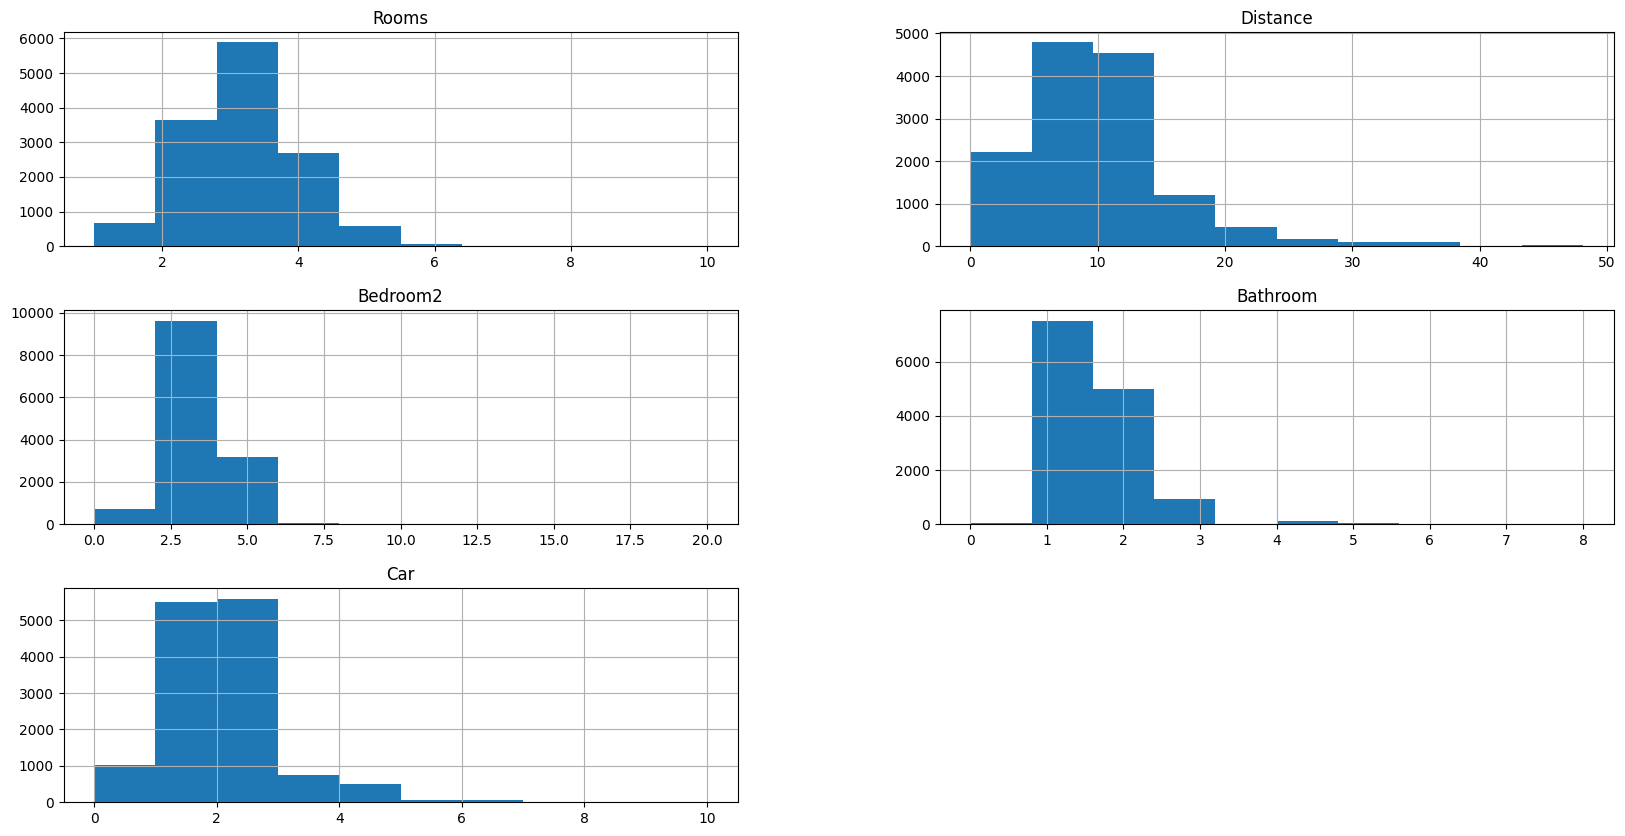

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10];
df[lst_num].hist()
plt.show()

<h4> Correlación entre variables numéricas </h4>

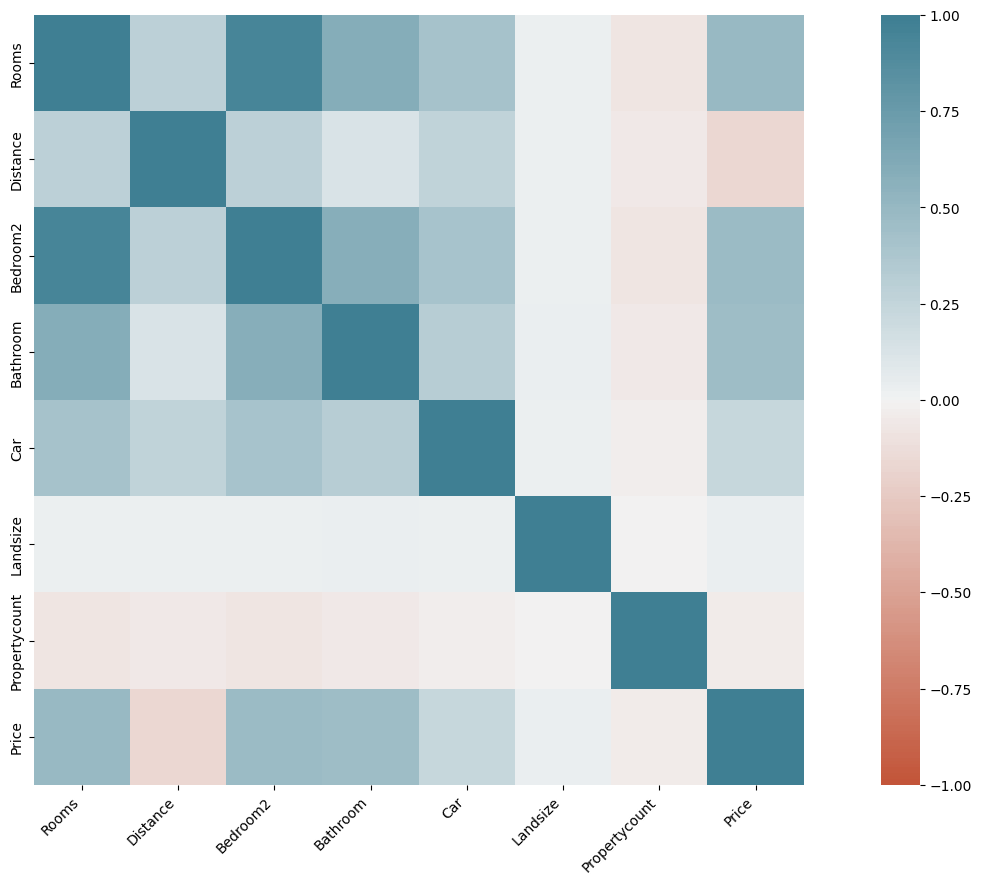

In [ ]:
lst_numv = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Propertycount', 'Price']

df_num = df[lst_numv]

corr= df_num.corr()
ax = sb.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Se puede observar que las variables <i>Rooms</i>, <i>Bedroom2</i> y <i>Bathroom</i> están correlacionadas al precio de venta. Además, <i>Rooms</i>, y <i>Bedroom2</i> están muy correlacionadas.

<h2>Preprocesamiento</h2>

<h3> Datos faltantes </h3>

Antes de hacer cualquier evaluación sobre los datos es importante realizar siempre un tratamiento previo con el fin de abordar el problema de los datos faltantes. Cabe mencionar que en ocasiones no existen valores faltantes o nulos, sin embargo existen valores en cero, los cuales pueden reflejar datos faltantes.

A continuación se indican algunas técnicas para reemplazar los datos faltantes:

En caso de identificar que existen valores nulos en el dataset, se deben realizar acciones para solucionar el problema. Existen diferentes métodos, sin embargo los más comunes son:

<ol>
    <li> Medidas generales </li>
    <ol>
        <li> Eliminar las muestras (filas) en caso de que se tengan varios valores nulos en la fila, o si falta un dato que es muy relevante. </li>
        <li> Eliminar las características (columnas) en caso de que varios registros no tengan esa información. </li>
    </ol>
    <li> Variables categoricas </li>
    <ol>
        <li> Agregar una categoría que indique la falta de información. </li>
        <li> Reemplazar por un valor constante, tal como la media, mediana o moda de la variable </li>
        <li> Asignación aleatoria de categorías escogiendo las que se encuentran presentes en la variable, distribución uniforme. </li>
    </ol>
    <li> Variables numéricas </li>
    <ol>
        <li> Reemplazar por un valor constante, tal como la media, mediana o moda de la variable </li>
    </ol>
</ol>

In [ ]:
# Columnas que tienen valor cero
(df==0).sum(axis=0)

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            6
Postcode            0
Bedroom2           16
Bathroom           34
Car              1026
Landsize         1939
BuildingArea       17
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
cols_nan = ['Car', 'YearBuilt', 'CouncilArea']

<h3>Eliminar variables (columnas) / registros (filas) con valores faltantes</h3>

Es una de las estrategias más sencilla, ya que se eliminan los registros que contienen un valor NaN o null.

Para eliminar una columna o fila con **pandas**, se emplea la función **drop**. Sus parámetros son:
<center>
    drop(column(s), axis)
</center>

Si es una columna se coloca entre comillas. Para nuestro caso, se va a omitir la variable *BuildingArea* pues el 47% del dataset no cuenta con este dato. Por otro lado, si se va a borrar una columna se le asigna 1 al parametros *axis*, en el caso de que sea una fila, es 0, pero es el valor por default.

Otro método para borrar filas de nulos es **dropna**.

<center>
    dropna(axis)
</center>

In [ ]:
df_delcol = df.drop('BuildingArea', axis = 1)
#df_delrow = df.drop(df.index[2:4])
#df_delmask = df.drop(df[df.Distance==0].index)

In [ ]:
df_delcol.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df_dropr_null = df.dropna()
df_dropc_null = df.dropna(axis=1)
print(f'Original {df.shape}\nEliminando filas con nulos {df_dropr_null.shape}\nEliminando columnas con nulos {df_dropc_null.shape}')

Original (13580, 21)
Eliminando filas con nulos (6196, 21)
Eliminando columnas con nulos (13580, 17)


<h3>Reemplazo con valores constantes</h3>

<h4>Media</h4>
Para calcular la media se usa el método <i>mean</i>

In [ ]:
df_media_nan = df_delcol[cols_nan[:-1]].copy()
df_media_nan.mean()

Car             1.610075
YearBuilt    1964.684217
dtype: float64

In [ ]:
display(df_media_nan.head(10))

,Car,YearBuilt
0,1.0,NaN
1,0.0,1900.0
2,0.0,1900.0
3,1.0,NaN
4,2.0,2014.0
5,0.0,NaN
6,0.0,1910.0
7,2.0,1890.0
8,1.0,NaN
9,2.0,1900.0


Reemplazando sólo valores NaN

In [ ]:
df_media_nan = df_media_nan.mask(df_media_nan.isna(), df_media_nan.mean().round(), axis=1)
display(df_media_nan.head(10))

,Car,YearBuilt
0,1.0,1965.0
1,0.0,1900.0
2,0.0,1900.0
3,1.0,1965.0
4,2.0,2014.0
5,0.0,1965.0
6,0.0,1910.0
7,2.0,1890.0
8,1.0,1965.0
9,2.0,1900.0


Reemplazando valores NaN y 0 de la columna <i>YearBuilt</i>

In [ ]:
df_media = df_delcol[cols_nan[1]].copy()

In [ ]:
df_media.replace(0.0, np.nan).mean()

1964.6842169408897

In [ ]:
df_media = df_media.mask(df_media.isna(), df_media.replace(0.0, np.nan).mean().round())
display(df_media.head(10))

0    1965.0
1    1900.0
2    1900.0
3    1965.0
4    2014.0
5    1965.0
6    1910.0
7    1890.0
8    1965.0
9    1900.0
Name: YearBuilt, dtype: float64

<h4>Moda</h4>
Para calcular la moda se usa el método <i>mode</i>

In [ ]:
df_moda_nan = df_delcol[cols_nan[:-1]].copy()
df_moda_nan.mode()

,Car,YearBuilt
0,2.0,1970.0


In [ ]:
display(df_moda_nan.head(10))

,Car,YearBuilt
0,1.0,NaN
1,0.0,1900.0
2,0.0,1900.0
3,1.0,NaN
4,2.0,2014.0
5,0.0,NaN
6,0.0,1910.0
7,2.0,1890.0
8,1.0,NaN
9,2.0,1900.0


Reemplazando sólo valores NaN

In [ ]:
df_moda_nan = df_moda_nan.mask(df_moda_nan.isna(), df_moda_nan.mode().iloc[0], axis=1)
display(df_moda_nan.head(10))

,Car,YearBuilt
0,1.0,1970.0
1,0.0,1900.0
2,0.0,1900.0
3,1.0,1970.0
4,2.0,2014.0
5,0.0,1970.0
6,0.0,1910.0
7,2.0,1890.0
8,1.0,1970.0
9,2.0,1900.0


<h4> Interpolación lineal </h4>

Para reemplazar los NaN mediante interpolación lineal se usa el método *interpolate*. Su sintaxis es:

<center>
    interpolate(method, limit_direction)
</center>

donde **'linear'** debe asignarse a *method*. En el caso de limit_direction se pueden asignar los siguientes valores **'forward'** empieza en los primeros, **'backward'** empieza por los últimos y **'both'** lo hace en toda la columna.

In [ ]:
df_inter = df_delcol[cols_nan[:-1]].copy()

In [ ]:
display(df_inter.head(10))

,Car,YearBuilt
0,1.0,NaN
1,0.0,1900.0
2,0.0,1900.0
3,1.0,NaN
4,2.0,2014.0
5,0.0,NaN
6,0.0,1910.0
7,2.0,1890.0
8,1.0,NaN
9,2.0,1900.0


Reemplazando sólo valores NaN

In [ ]:
df_inter = df_inter.interpolate(method='linear', limit_direction='forward')
display(df_inter.head(10))

,Car,YearBuilt
0,1.0,NaN
1,0.0,1900.0
2,0.0,1900.0
3,1.0,1957.0
4,2.0,2014.0
5,0.0,1962.0
6,0.0,1910.0
7,2.0,1890.0
8,1.0,1895.0
9,2.0,1900.0
